In [202]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random

In [203]:
def get_random_frame(path):
    
	vidcap = cv.VideoCapture(path)
 
	# get total number of frames
	totalFrames = vidcap.get(cv.CAP_PROP_FRAME_COUNT)
	randomFrameNumber = random.randint(0, totalFrames)
 
	# set frame position
	vidcap.set(cv.CAP_PROP_POS_FRAMES,randomFrameNumber)
	success, image = vidcap.read()
 
	return image.astype(np.uint8) if success else None

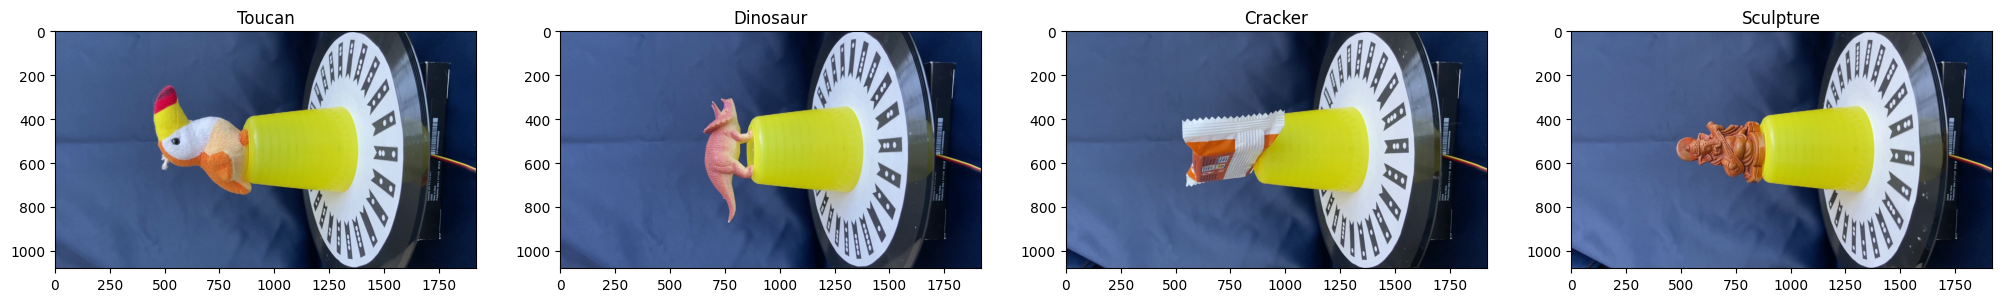

In [204]:
#TODO: random frame of the 4 object and try to find a good technique tath segment the object 

# add the edge to the rgb to obtain a clear view on the goodness of the segmentation

rgb_obj1 = cv.cvtColor(get_random_frame('../data/obj01.mp4'), cv.COLOR_BGR2RGB)
rgb_obj2 = cv.cvtColor(get_random_frame('../data/obj02.mp4'), cv.COLOR_BGR2RGB)
rgb_obj3 = cv.cvtColor(get_random_frame('../data/obj03.mp4'), cv.COLOR_BGR2RGB)
rgb_obj4 = cv.cvtColor(get_random_frame('../data/obj04.mp4'), cv.COLOR_BGR2RGB)

plt.figure(figsize=(25,7))

plt.subplot(1,4,1)
plt.title("Toucan")
plt.imshow(rgb_obj1)

plt.subplot(1,4,2)
plt.title("Dinosaur")
plt.imshow(rgb_obj2)

plt.subplot(1,4,3)
plt.title("Cracker")
plt.imshow(rgb_obj3)

plt.subplot(1,4,4)
plt.title("Sculpture")
plt.imshow(rgb_obj4)

In [205]:
def change_contrast(img):
	lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
	l_channel, a, b = cv.split(lab)

	# Applying CLAHE to L-channel
	#3.0, (5,5)
	l_clahe = cv.createCLAHE(clipLimit=8, tileGridSize=(13,13))
	l_channel = l_clahe.apply(l_channel)

	# merge the CLAHE enhanced L-channel with the a and b channel
	limg = cv.merge((l_channel,a,b))

	# Converting image from LAB Color model to BGR color spcae
	return cv.cvtColor(limg, cv.COLOR_LAB2RGB)

In [206]:
# Changing contrast and converting from RGB to HSV

enhanced_hsv1 = cv.cvtColor(change_contrast(rgb_obj1), cv.COLOR_RGB2HSV)
enhanced_hsv2 = cv.cvtColor(change_contrast(rgb_obj2), cv.COLOR_RGB2HSV)
enhanced_hsv3 = cv.cvtColor(change_contrast(rgb_obj3), cv.COLOR_RGB2HSV)
enhanced_hsv4 = cv.cvtColor(change_contrast(rgb_obj4), cv.COLOR_RGB2HSV)

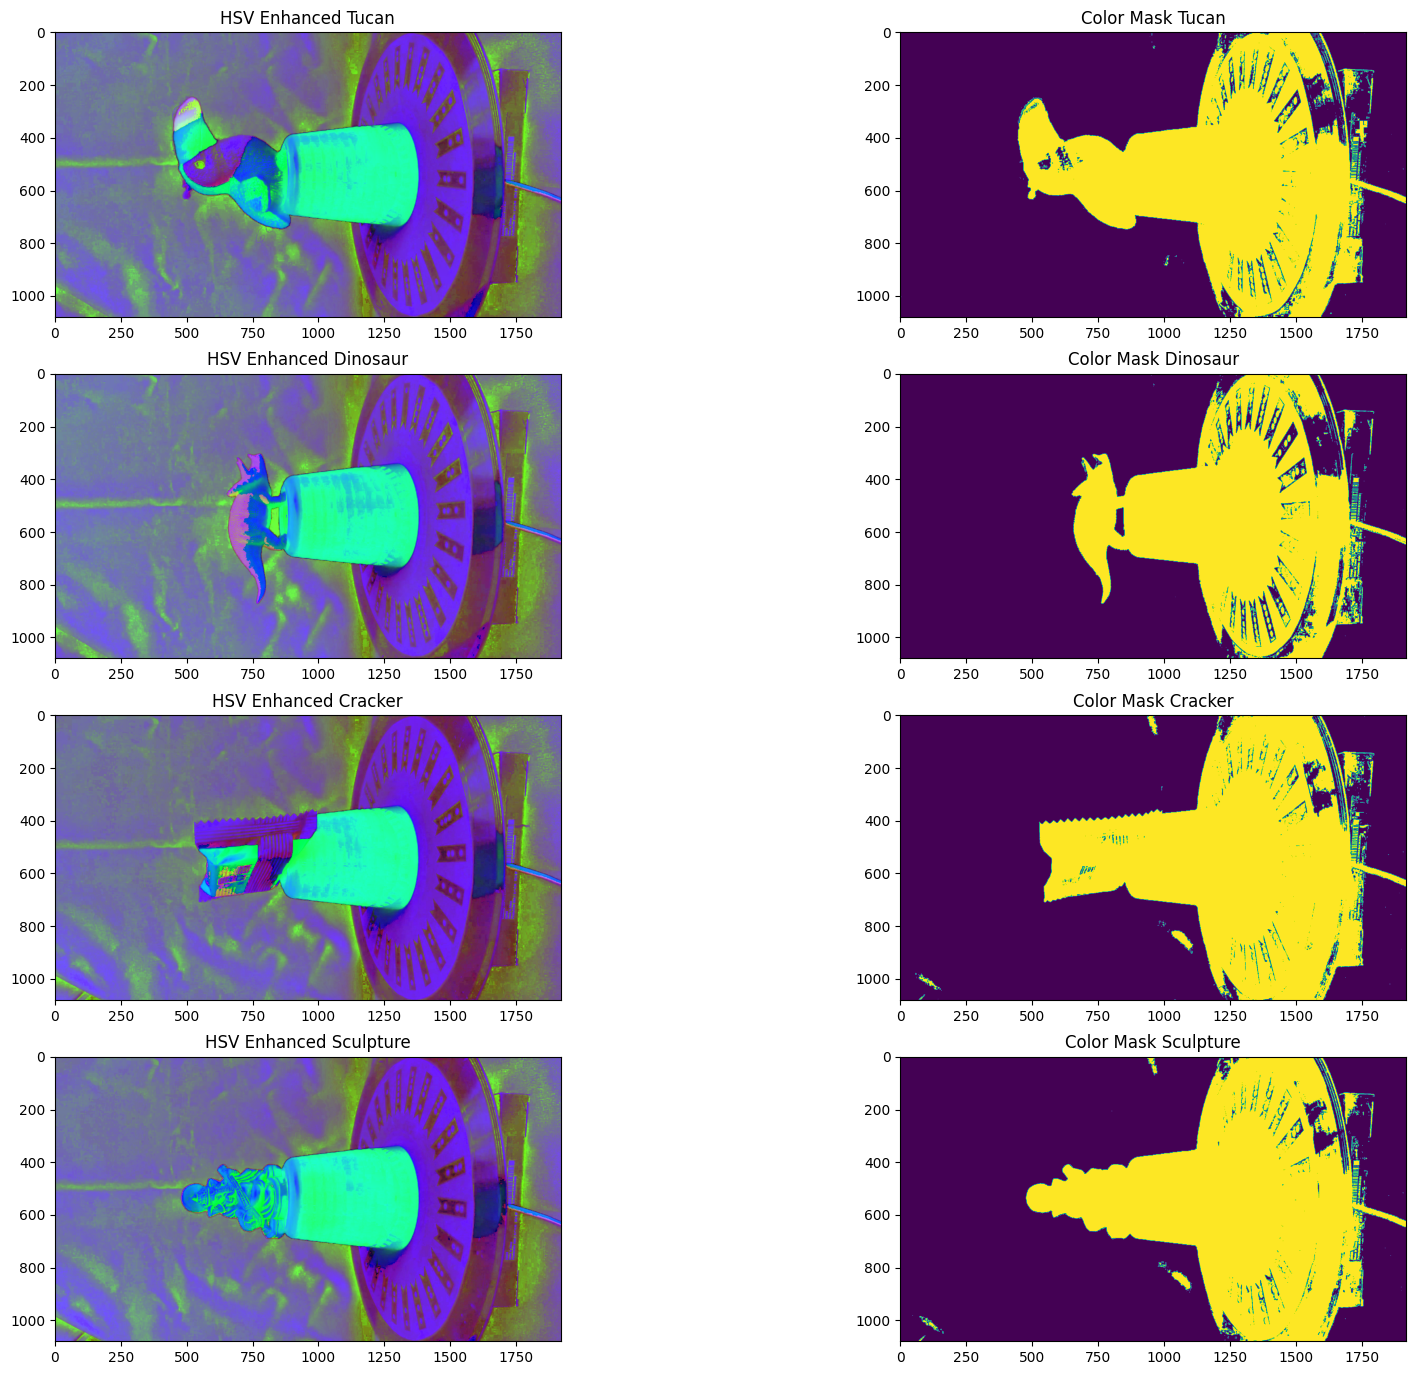

In [207]:

# Inverting the mask
color_mask_obj1 = cv.bitwise_not(cv.inRange(enhanced_hsv1, np.array([105,70,0]), np.array([165,255,255])))
color_mask_obj2 = cv.bitwise_not(cv.inRange(enhanced_hsv2, np.array([105,70,0]), np.array([165,255,255])))
color_mask_obj3 = cv.bitwise_not(cv.inRange(enhanced_hsv3, np.array([105,70,0]), np.array([165,255,255])))
color_mask_obj4 = cv.bitwise_not(cv.inRange(enhanced_hsv4, np.array([105,70,0]), np.array([165,255,255])))


plt.figure(figsize=(20,17))

plt.subplot(4,2,1)
plt.title("HSV Enhanced Tucan")
plt.imshow(enhanced_hsv1)

plt.subplot(4,2,2)
plt.title("Color Mask Tucan")
plt.imshow(color_mask_obj1)

plt.subplot(4,2,3)
plt.title("HSV Enhanced Dinosaur")
plt.imshow(enhanced_hsv2)

plt.subplot(4,2,4)
plt.title("Color Mask Dinosaur")
plt.imshow(color_mask_obj2)

plt.subplot(4,2,5)
plt.title("HSV Enhanced Cracker")
plt.imshow(enhanced_hsv3)

plt.subplot(4,2,6)
plt.title("Color Mask Cracker")
plt.imshow(color_mask_obj3)

plt.subplot(4,2,7)
plt.title("HSV Enhanced Sculpture")
plt.imshow(enhanced_hsv4)

plt.subplot(4,2,8)
plt.title("Color Mask Sculpture")
plt.imshow(color_mask_obj4)

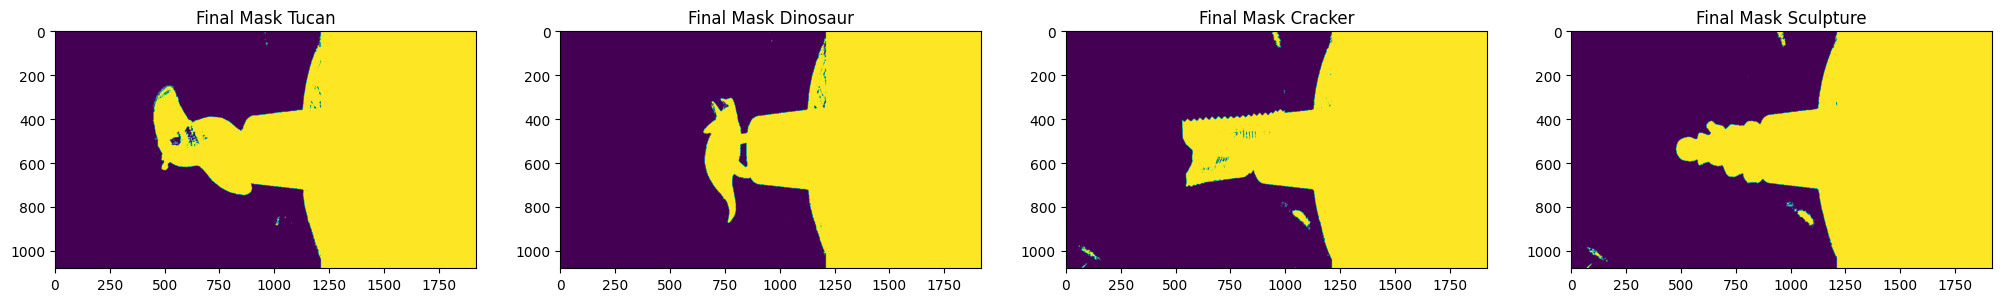

In [208]:
rectangular_mask = np.full(rgb_obj1.shape[:2], 0, np.uint8)
rectangular_mask[:,1210:rgb_obj1.shape[1]] = 255

mask_obj1 = cv.bitwise_or(color_mask_obj1, rectangular_mask)
mask_obj2 = cv.bitwise_or(color_mask_obj2, rectangular_mask)
mask_obj3 = cv.bitwise_or(color_mask_obj3, rectangular_mask)
mask_obj4 = cv.bitwise_or(color_mask_obj4, rectangular_mask)


plt.figure(figsize=(25,7))

plt.subplot(1,4,1)
plt.title("Final Mask Tucan")
plt.imshow(mask_obj1)

plt.subplot(1,4,2)
plt.title("Final Mask Dinosaur")
plt.imshow(mask_obj2)

plt.subplot(1,4,3)
plt.title("Final Mask Cracker")
plt.imshow(mask_obj3)

plt.subplot(1,4,4)
plt.title("Final Mask Sculpture")
plt.imshow(mask_obj4)

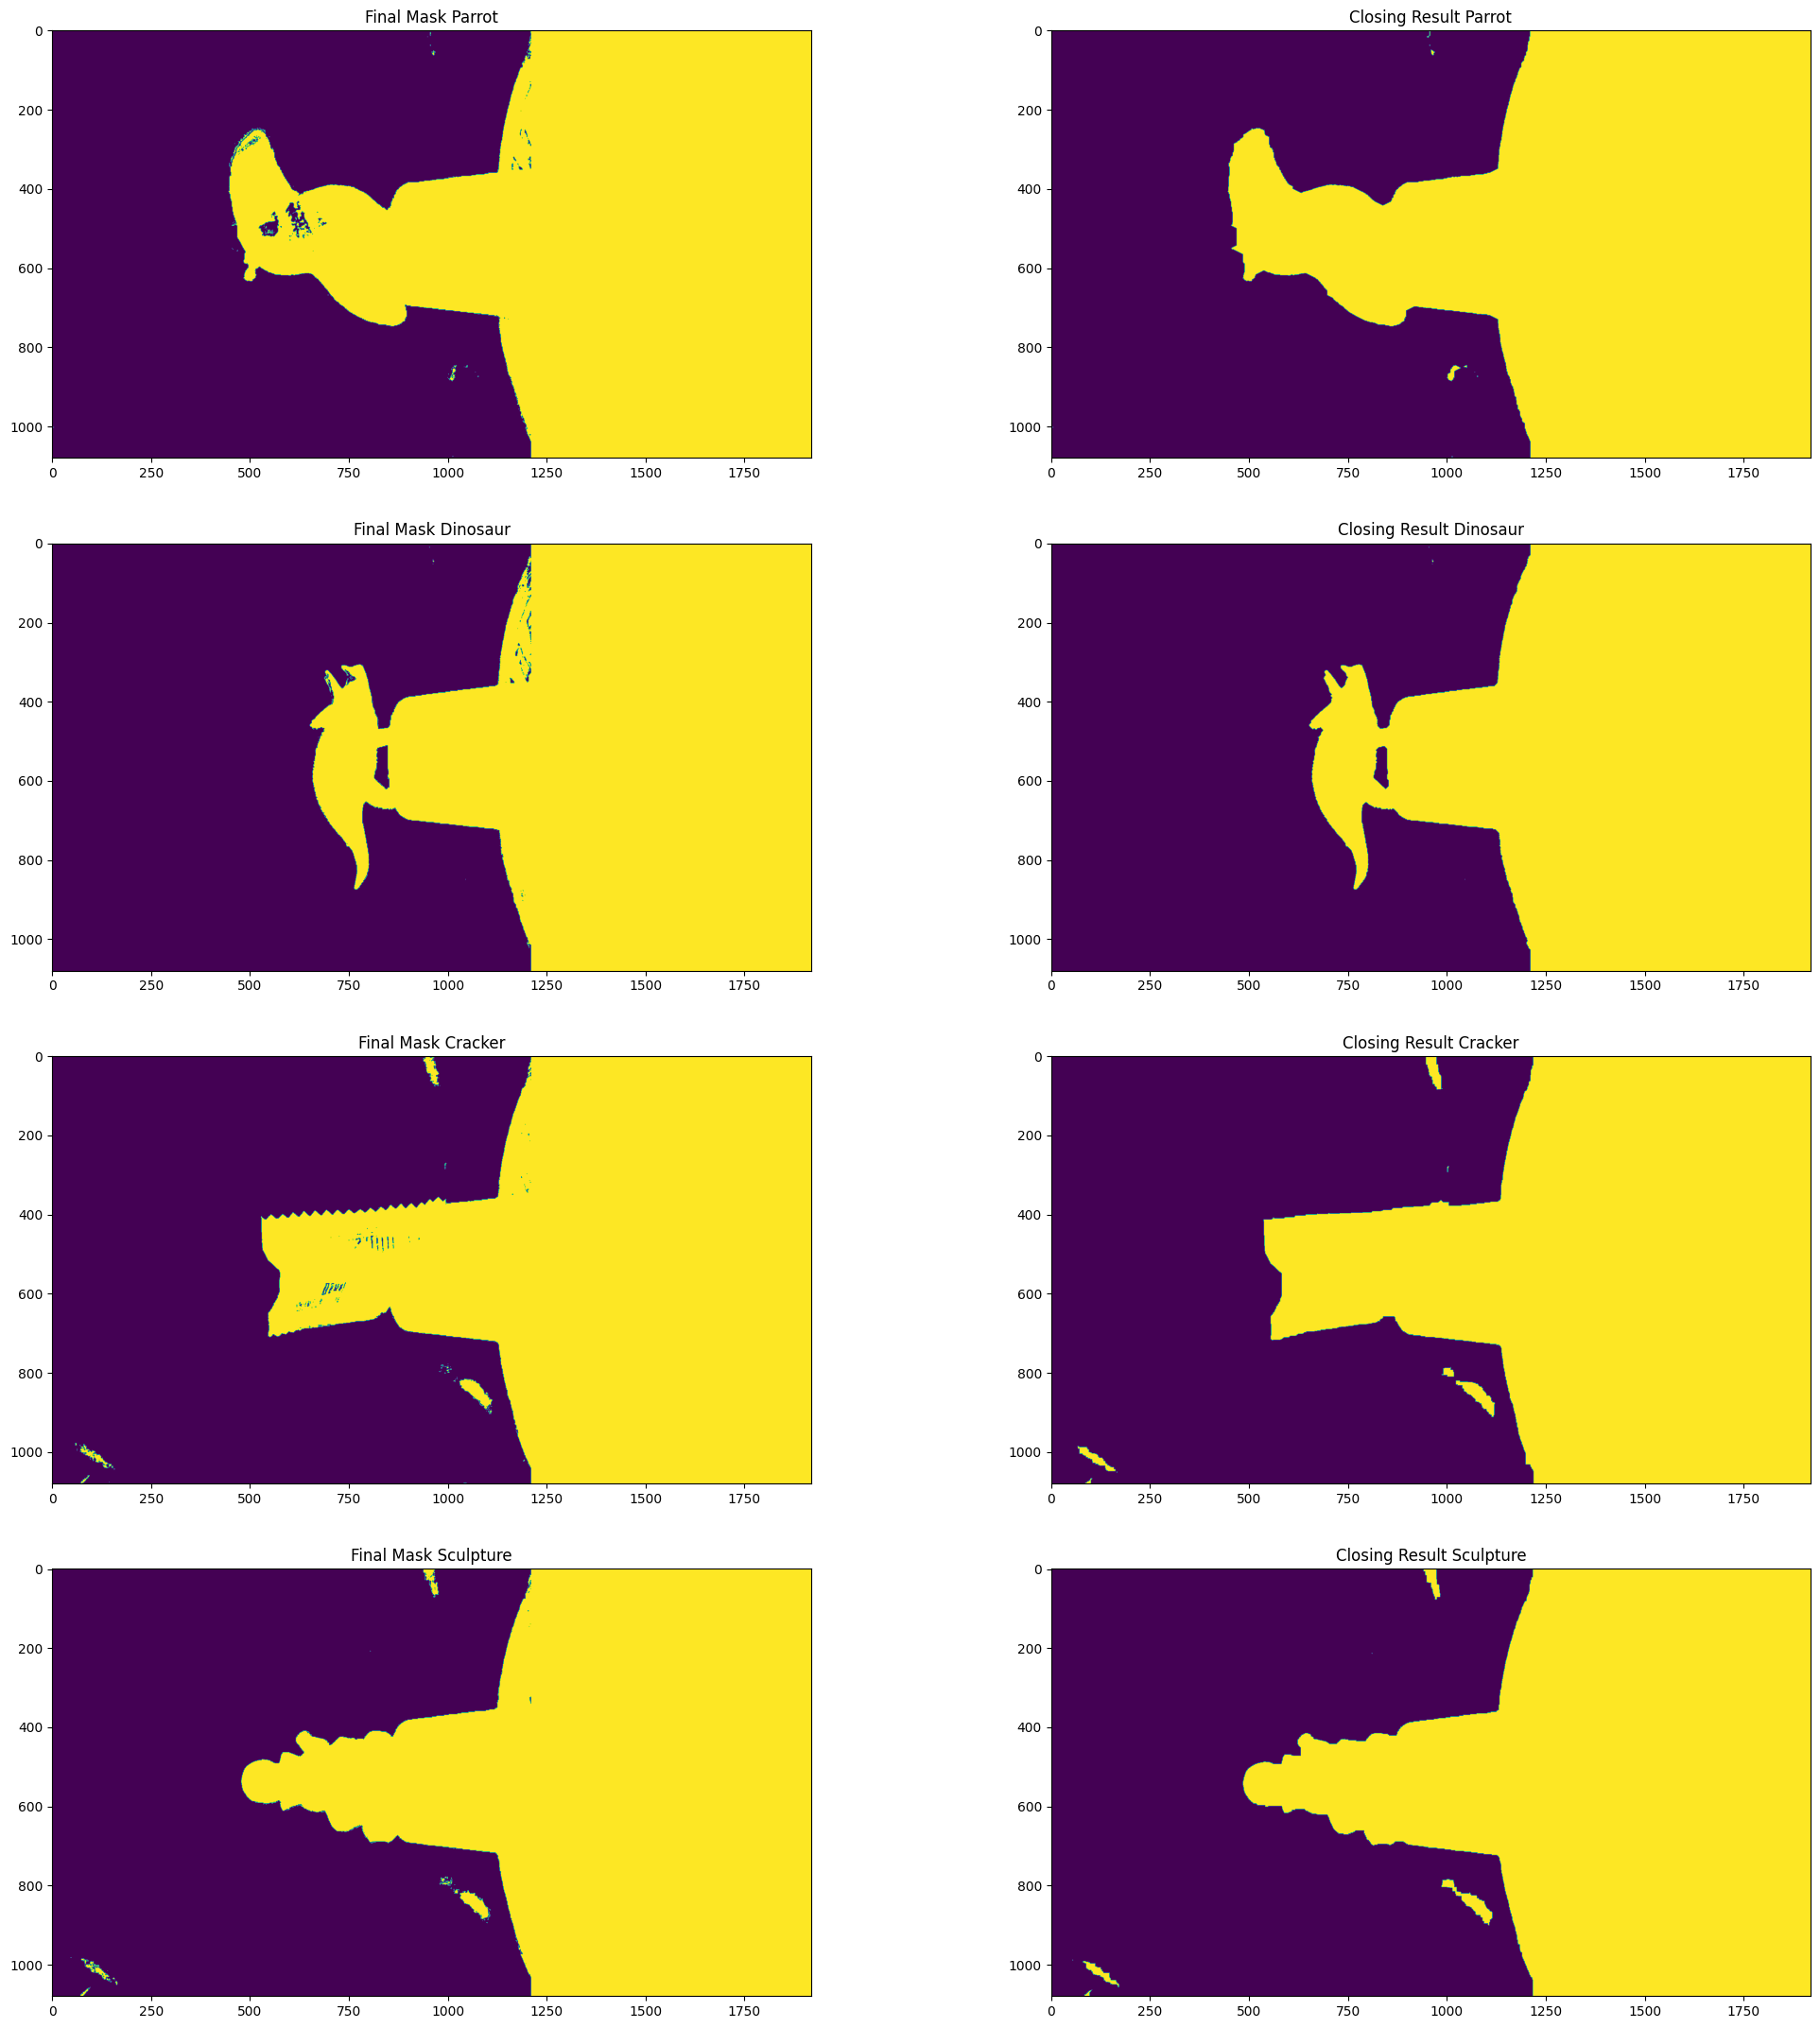

In [209]:
# CLOSING

kernel = cv.getStructuringElement(cv.MORPH_RECT, (4,4))
kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
kernel3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))

closing_obj1 = cv.morphologyEx(mask_obj1, cv.MORPH_CLOSE, kernel2, iterations = 10)
closing_obj2 = cv.morphologyEx(mask_obj2, cv.MORPH_CLOSE, kernel3, iterations = 6)
closing_obj3 = cv.morphologyEx(mask_obj3, cv.MORPH_CLOSE, kernel, iterations = 8)
closing_obj4 = cv.morphologyEx(mask_obj4, cv.MORPH_CLOSE, kernel, iterations = 6)


plt.figure(figsize=(25,27))

plt.subplot(4,2,1)
plt.title("Final Mask Parrot")
plt.imshow(mask_obj1)

plt.subplot(4,2,2)
plt.title("Closing Result Parrot")
plt.imshow(closing_obj1)

plt.subplot(4,2,3)
plt.title("Final Mask Dinosaur")
plt.imshow(mask_obj2)

plt.subplot(4,2,4)
plt.title("Closing Result Dinosaur")
plt.imshow(closing_obj2)

plt.subplot(4,2,5)
plt.title("Final Mask Cracker")
plt.imshow(mask_obj3)

plt.subplot(4,2,6)
plt.title("Closing Result Cracker")
plt.imshow(closing_obj3)

plt.subplot(4,2,7)
plt.title("Final Mask Sculpture")
plt.imshow(mask_obj4)

plt.subplot(4,2,8)
plt.title("Closing Result Sculpture")
plt.imshow(closing_obj4)

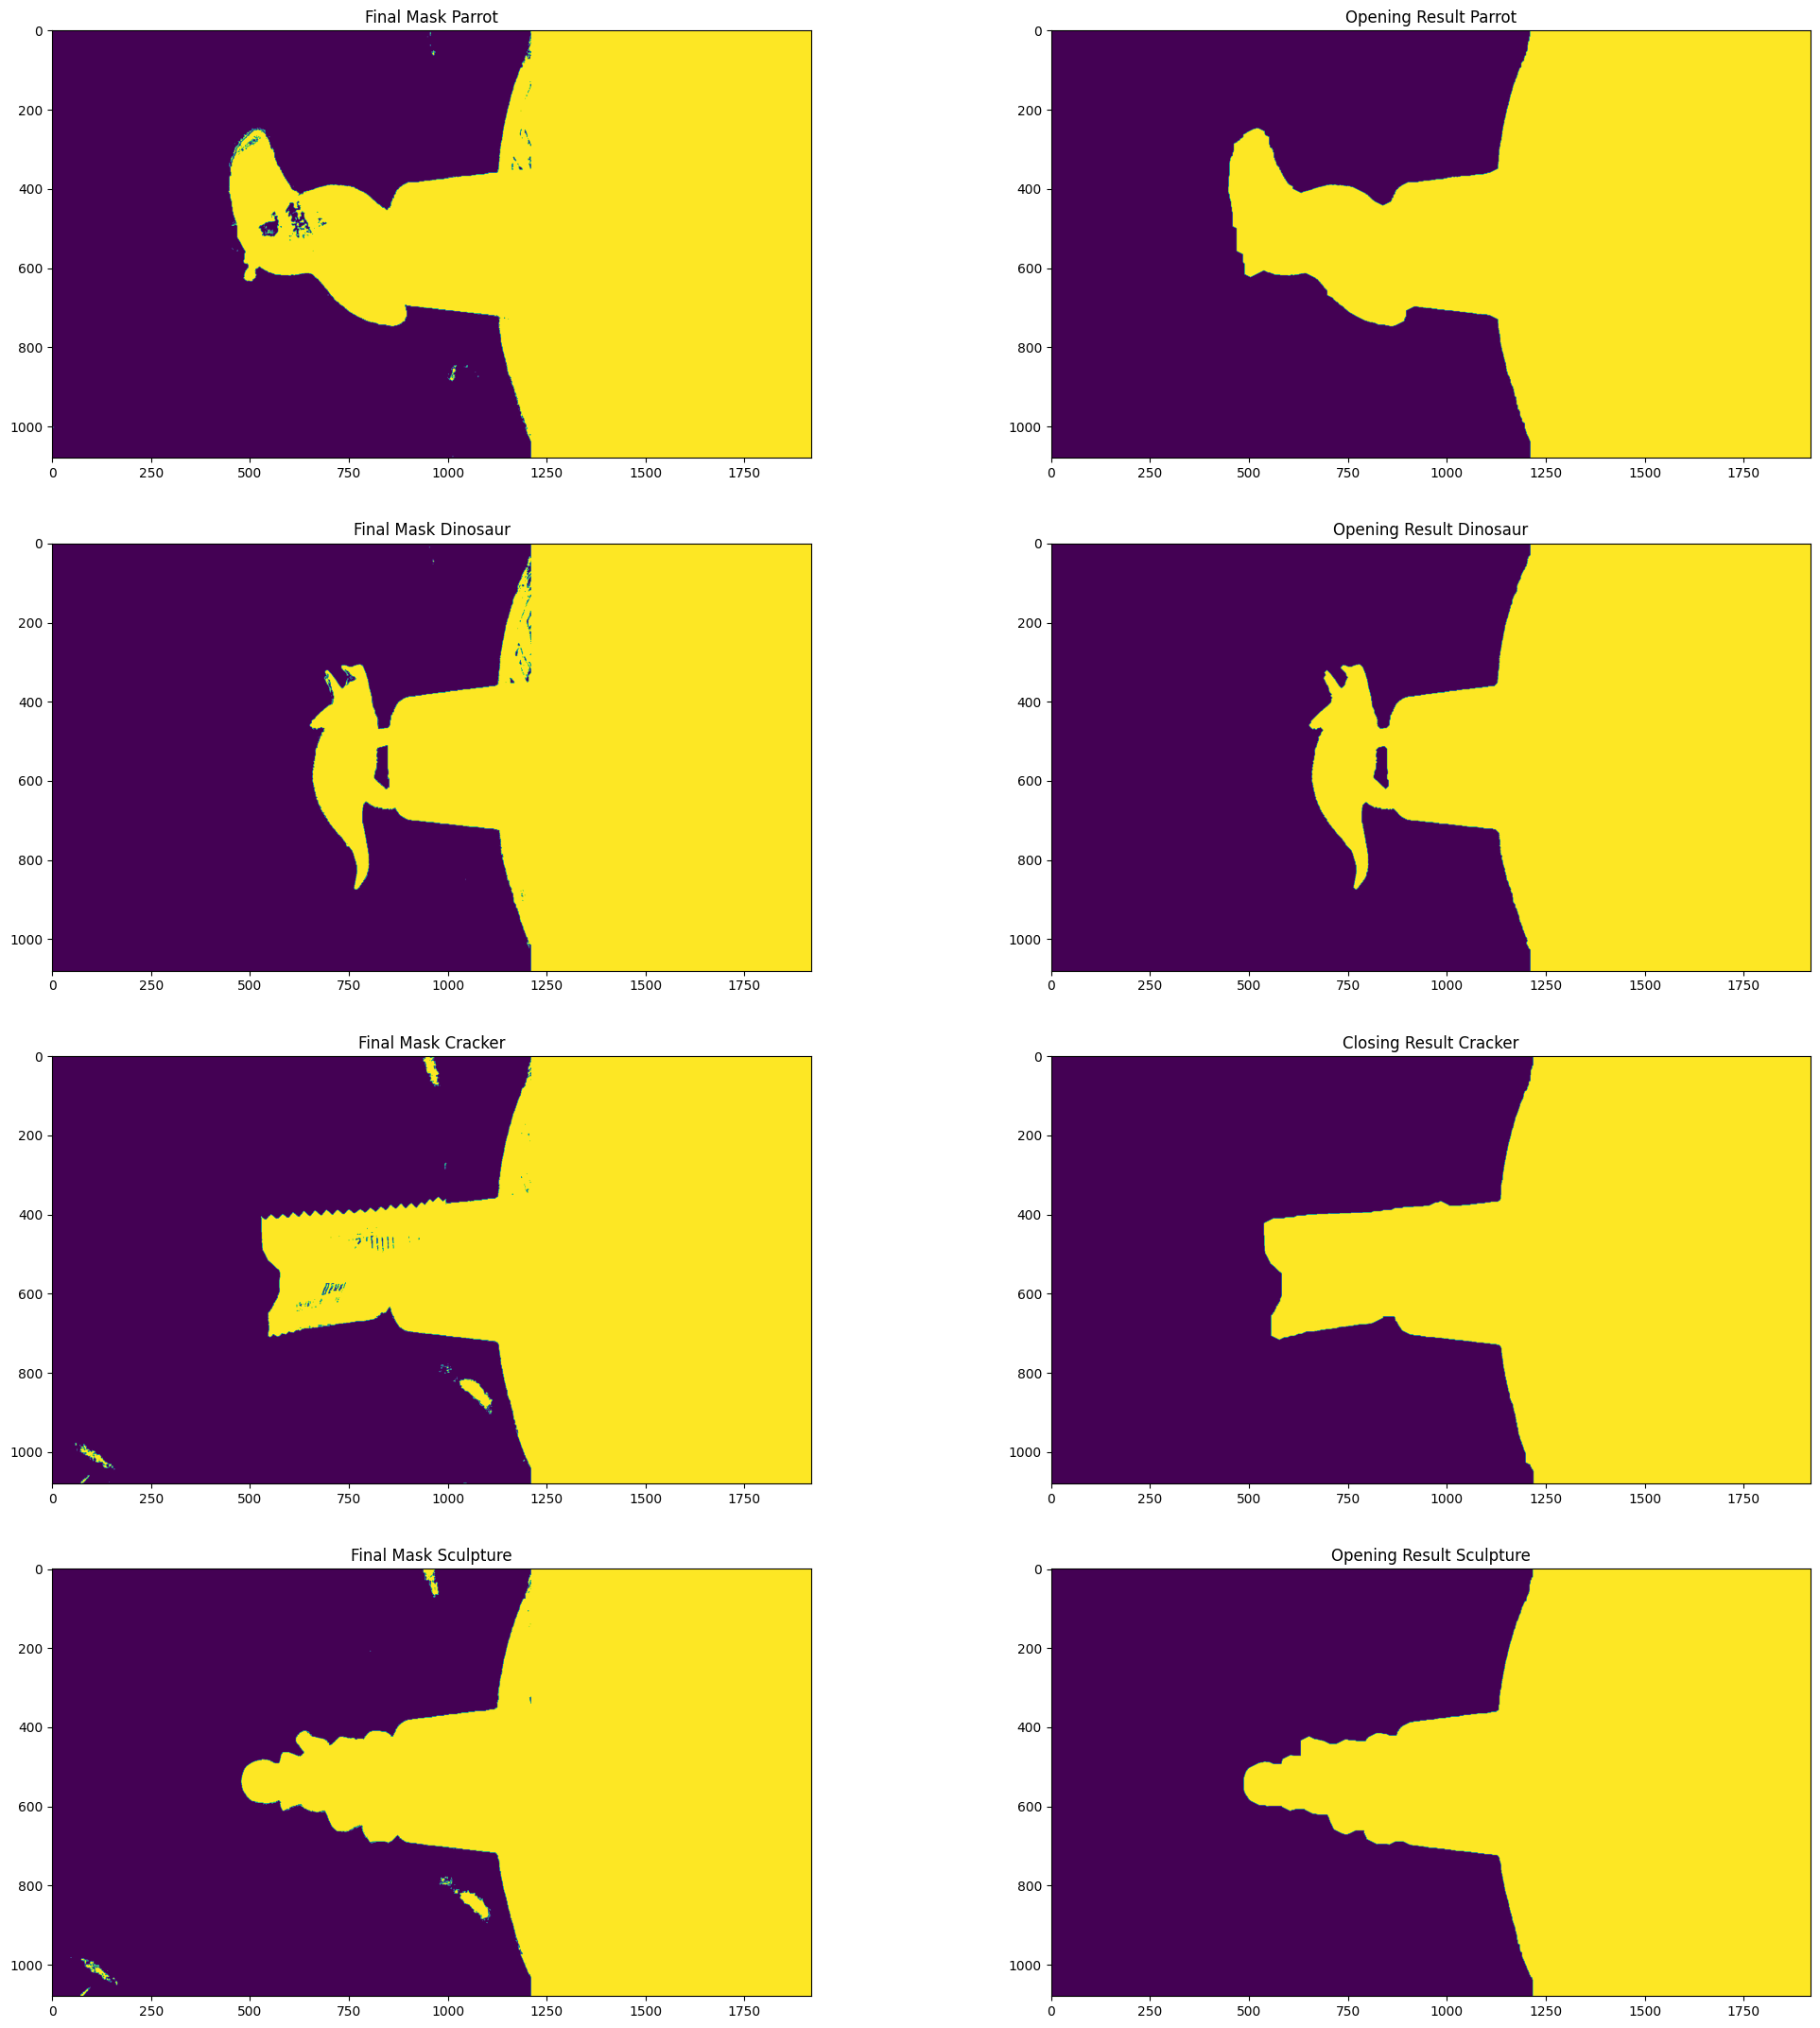

In [210]:
# OPENING

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))

opening_obj1 = cv.morphologyEx(closing_obj1, cv.MORPH_OPEN, kernel, iterations=7)
opening_obj2 = cv.morphologyEx(closing_obj2, cv.MORPH_OPEN, kernel2, iterations=5)
opening_obj3 = cv.morphologyEx(closing_obj3, cv.MORPH_OPEN, kernel, iterations=10)
opening_obj4 = cv.morphologyEx(closing_obj4, cv.MORPH_OPEN, kernel, iterations=10)


plt.figure(figsize=(25,27))

plt.subplot(4,2,1)
plt.title("Final Mask Parrot")
plt.imshow(mask_obj1)

plt.subplot(4,2,2)
plt.title("Opening Result Parrot")
plt.imshow(opening_obj1)

plt.subplot(4,2,3)
plt.title("Final Mask Dinosaur")
plt.imshow(mask_obj2)

plt.subplot(4,2,4)
plt.title("Opening Result Dinosaur")
plt.imshow(opening_obj2)

plt.subplot(4,2,5)
plt.title("Final Mask Cracker")
plt.imshow(mask_obj3)

plt.subplot(4,2,6)
plt.title("Closing Result Cracker")
plt.imshow(opening_obj3)

plt.subplot(4,2,7)
plt.title("Final Mask Sculpture")
plt.imshow(mask_obj4)

plt.subplot(4,2,8)
plt.title("Opening Result Sculpture")
plt.imshow(opening_obj4)

In [211]:
def apply_segmentation(mask, img):
    segmented = img
    
    foreground = np.where(mask==255)
    background = np.where(mask==0)
    
    segmented[foreground[0], foreground[1], :] = [255, 255, 255]
    segmented[background[0], background[1], :] = [0, 0, 0]
    
    return segmented
    

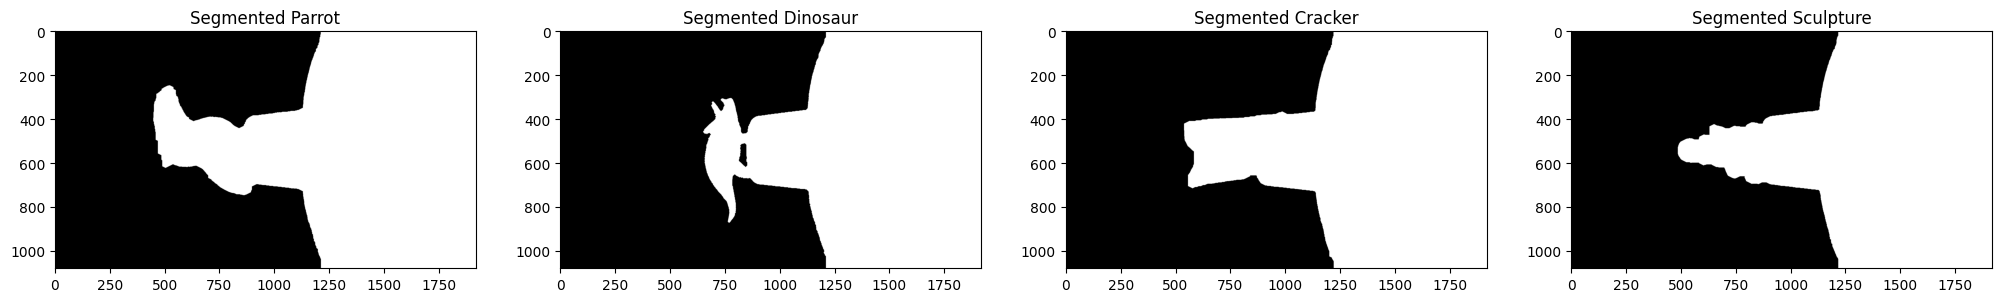

In [212]:
segmented_obj1 = apply_segmentation(opening_obj1, rgb_obj1)
segmented_obj2 = apply_segmentation(opening_obj2, rgb_obj2)
segmented_obj3 = apply_segmentation(opening_obj3, rgb_obj3)
segmented_obj4 = apply_segmentation(opening_obj4, rgb_obj4)


plt.figure(figsize=(25,17))

plt.subplot(1,4,1)
plt.title("Segmented Parrot")
plt.imshow(segmented_obj1)

plt.subplot(1,4,2)
plt.title("Segmented Dinosaur")
plt.imshow(segmented_obj2)

plt.subplot(1,4,3)
plt.title("Segmented Cracker")
plt.imshow(segmented_obj3)

plt.subplot(1,4,4)
plt.title("Segmented Sculpture")
plt.imshow(segmented_obj4)
